# Week 10 - Neural Networks

Learning contents:
1. Detailed example: Two-layer MLP for regression
    - Forward pass: Calculate the values of $z_1$, $z_2$, and $y$
    - Compute the mean squared error
    - Using backpropagation, compute the gradient or the error w.r.t the weights $w^{(2)}_2$ and $w^{(1)}_{2,2}$ 
    - Compute the updated weights for $w^{(2)}_2$ and $w^{(1)}_{2,2}$ 
2. PyTorch: 2-layer MLP for classification
    - Create and train a 2-layer MLP

# 1) Detailed example: Two-layer MLP for regression
We'll be working through a forward and back-propagation example in all its details for a 2-layer MLP for regression. Our network has the following structure:

![](two-layer-nn.svg)

Where 
    $$
    z_j = \text{ReLU}\left(a_j \right)
    \qquad
    a_j = \sum_i w^{(1)}_{ij} x_i
    \qquad
    y_j = \sum_i w^{(2)}_{ij} z_i
    $$
and the biases 
    $$
    x_0 = z_0 = 1
    $$

Suppose, we have the weights
    $$
    \mathbf{W}^{(1)} = \left[ 
        \begin{matrix}
        0.1 & 0.2\\
        -1.1 & 1.2\\
        -2.1 & 2.2
        \end{matrix}
    \right]
    \qquad
    \mathbf{w}^{(2)} = \left[ 
        \begin{matrix}
        -0.1\\
        1.1 \\
        2.2
        \end{matrix}
    \right]
    $$
Notice that the bias weights are included in the weight matrix. Relating it to the drawing, we have $w_{0,1} = 0.1$, $w_{1,2} = 1.2$

Moreover, we are given an input
    $$
    \mathbf{x} = \left[ 
        \begin{matrix}
        0.1 \\
        0.2
        \end{matrix}
    \right]
    $$
    
Relating these to the drawing, we have $w^{(1)}_{1,2} = 1.2$ and $x_1 = 0.1$

## 1.1) Forward pass: Calculate the values of $z_1$, $z_2$, and $y$

Use the values and formulas given above, as well as information about the ReLU activation function given in lecture 19 sldie 9 to determine the values. 

In [18]:
import numpy as np

W1 = np.array([
    [0.1, 0.2],      
    [-1.1, 1.2],     
    [-2.1, 2.2]      
])

w2 = np.array([
    [-0.1],  
    [1.1],    
    [2.2]     
])

x = np.array([[1.0], [0.1], [0.2]])  

print(f"a's:")
print(f"a1 = {a[0,0]:.3f}")
print(f"a2 = {a[1,0]:.3f}\n")

z = np.maximum(0, a)
print(f"z's:")
print(f"z1 = {z[0,0]:.3f}")
print(f"z2 = {z[1,0]:.3f}\n")

z_with_bias = np.vstack([[[1.0]], z])  

y = w2.T @ z_with_bias
print(f"Output:")
print(f"y = {y[0,0]:.3f}")

a1, a2 = a[0,0], a[1,0]
z1, z2 = z[0,0], z[1,0]
y_pred = y[0,0]


a's:
a1 = -0.430
a2 = 0.760

z's:
z1 = 0.000
z2 = 0.760

Output:
y = 1.572


## 1.2) Compute the mean squared error
Suppose our target $t=2$.
Use the formula for MSE shown in lecture 19, slide 17 (8)

In [20]:
t = 2.0

mse = 0.5 * (y_pred - t)**2

print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 0.0916


## 1.3) Using backpropagation, compute the gradient or the error w.r.t the weights $w^{(2)}_2$ and $w^{(1)}_{2,2}$ 
This corresponds to the bottom row of weights on the figure

To compute this, look at formulas 5.65 - 5.67 in the course book(Bishop).

In [24]:
delta_y = y_pred - t

grad_w2_2 = delta_y * z2
print(f"Gradient w.r.t. w^(2)_2: {grad_w2_2:.4f}\n")

relu_prime_a2 = 1.0 if a2 > 0 else 0.0
delta_a2 = delta_y * w2[2, 0] * relu_prime_a2

x2 = x[2, 0]
grad_w1_22 = delta_a2 * x2
print(f"Gradient w.r.t. w^(1)_{{2,2}}: {grad_w1_22:.4f}\n")


Gradient w.r.t. w^(2)_2: -0.3253

Gradient w.r.t. w^(1)_{2,2}: -0.1883



## 1.4) Compute the updated weights for $w^{(2)}_2$ and $w^{(1)}_{2,2}$ 
Use a learning rate $\eta = 0.1$ 

You will want to use formula 5.43 in the course book to determine the updated weights



In [27]:
learning_rate = 0.1

w2_2_old = w2[2, 0]
w1_22_old = W1[2, 1]

w2_2_new = w2_2_old - learning_rate * grad_w2_2
w1_22_new = w1_22_old - learning_rate * grad_w1_22

print(f"Updated weight: {w2_2_new:.4f}")

print(f"Updated weight: {w1_22_new:.4f}")


Updated weight: 2.2325
Updated weight: 2.2188


# 2) PyTorch: 2-layer MLP for classification
Luckily, there are some nice Deep Learning libraries out there, that make working with neural networks a pleasure.
The two most noteable are [Tensorflow](https://www.tensorflow.org) and [PyTorch](https://pytorch.org). We'll be using the latter.

In order to install it in your conda environment you can use
```pip install torch torchvision```

A key feature of these libraries is that they can handle the gradient computation for you.
Moreover, they have a lot of layer types and losses, that are easily composable to handle computation of complex neural networks.

We'll be working with the classic MNIST dataset, which we can easily get via PyTorch

In [28]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_data = datasets.MNIST('../data', train=True, download=True, transform=transform)
test_data = datasets.MNIST('../data', train=False, download=True, transform=transform)

train_loader = DataLoader(
    train_data,
    batch_size = 64,
    shuffle=True,
)

test_loader = DataLoader(
    test_data,
    batch_size = 64,
)

A few steps happened here:
1. The dataset (train and test) was downloaded 
1. We created a `DataLoader` for each data split. Using this, we get batches of data (64 examples per batch here)
1. We told asked for the training data to be shuffled

Lets see what we get in a batch:

In [9]:
data, targets = next(iter(train_loader))
data.shape, targets.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

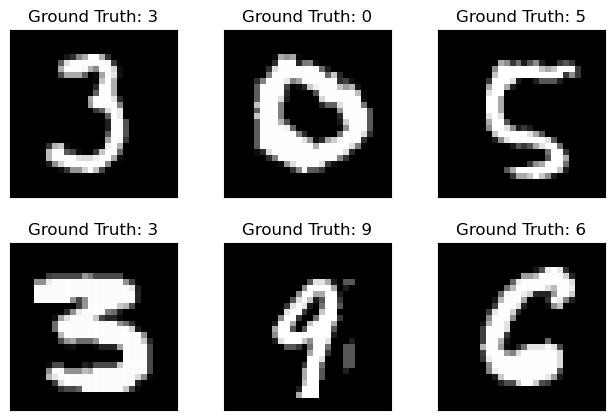

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(targets[i]))
    plt.xticks([])
    plt.yticks([])

## 2.1) Create and train a 2-layer MLP
For the network, use a single hidden layer of 512 neurons with a ReLU activation function for the first weight Linear layer. The output of the second Linear layer should be a softmax.

For optimisation, use the SGD optimizer with learning rate of 0.001, and the negative log-likelihood loss.

Train the network for 5 epochs on the train data, and report the prediction accuracy on the test data. You should be able to get about 90% correct.

Hint: check the [PyTorch documentation](https://pytorch.org/docs/stable/index.html) for usage of the layers, optimizers and losses

For this part of the exercise. You will want to replace each "REPLACE" with code correponding to the task described in the line above it. Such as "#Initialise Linear Layers", followed by "REPLACE", where you'd want to replace REPLACE with appropriate code for initialization of linear layers. 

In [ ]:
from torch.nn import Linear, Module
from torch.nn.functional import relu, log_softmax, nll_loss
from torch.optim import SGD

class Net(Module):
    def __init__(self):
        super(Net, self).__init__()
        # Initialise Linear layers
        # Input: 28x28 = 784 pixels, Hidden: 512 neurons, Output: 10 classes
        self.fc1 = Linear(28 * 28, 512)
        self.fc2 = Linear(512, 10)

    def forward(self, x):
        # Perform feed-forward computation step
        x = x.view(-1, 28 * 28)
        
        # First layer with ReLU activation
        x = relu(self.fc1(x))
        
        # Second layer with log softmax
        output = log_softmax(self.fc2(x), dim=1)
        return output

    
def train(
    model:Module, 
    train_loader:DataLoader, 
    optimizer: SGD, 
    epoch:int, 
    log_interval = 50
):
    # Set model to train mode
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # Reset the gradients
        optimizer.zero_grad()
        
        # Feed the data through the model
        output = model(data)
        
        # Compute the negative log-likelihood loss
        loss = nll_loss(output, target)
        
        # Backward propagate the gradients
        loss.backward()
        
        # Perform an update step using the optimizer
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            # Log (Optional)
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
        

def test(model:Module, test_loader:DataLoader):
    
    model.eval()
    
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            # Feed the data through the model
            output = model(data)
            
            # Accumulate test loss
            test_loss += nll_loss(output, target, reduction='sum').item()
            
            # Predict the class (it is the index of the max log-probability)
            pred = output.argmax(dim=1, keepdim=True)
            
            # Add to the number of correct
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    test_loss /= len(test_loader.dataset)

    # Print results
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss,
        correct, 
        len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)
    ))


In [34]:
model = Net()
optimizer = SGD(model.parameters(), lr=0.001)

epochs = 5
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch, log_interval=50)
    test(model, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.335403
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.205391
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.093933
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.946200
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.895933
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.800126
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.700099
Train Epoch: 1 [22400/60000 (37%)]	Loss: 1.553169
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.578864
Train Epoch: 1 [28800/60000 (48%)]	Loss: 1.457268
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.428959
Train Epoch: 1 [35200/60000 (59%)]	Loss: 1.359519
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.321250
Train Epoch: 1 [41600/60000 (69%)]	Loss: 1.246251
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.132890
Train Epoch: 1 [48000/60000 (80%)]	Loss: 1.128961
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.045236
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.963638
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.976039

Test set: Average loss: 0.9247, Accuracy: 8326/10000 (83%)